# WeatherPy

Note
Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Dependencieshttp://localhost:8888/notebooks/WeatherPy_ChangWoonJang.ipynb#WeatherPy and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "./output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities

['mar del plata',
 'ushuaia',
 'hobyo',
 'punta arenas',
 'rikitea',
 'tuktoyaktuk',
 'batagay-alyta',
 'katakwi',
 'kodiak',
 'keflavik',
 'almaznyy',
 'fort-shevchenko',
 'jamestown',
 'talara',
 'atuona',
 'bluff',
 'naples',
 'bredasdorp',
 'asau',
 'sentyabrskiy',
 'codrington',
 'puerto ayora',
 'cape town',
 'barentsburg',
 'saint-pierre',
 'yeppoon',
 'yellowknife',
 'carnarvon',
 'airai',
 'ahipara',
 'sibolga',
 'xacmaz',
 'srednekolymsk',
 'muros',
 'coquimbo',
 'victoria',
 'ballarat',
 'kapaa',
 'qaanaaq',
 'tasiilaq',
 'sobolevo',
 'manta',
 'new norfolk',
 'daru',
 'ponta do sol',
 'albany',
 'nanortalik',
 'khatanga',
 'kruisfontein',
 'tocopilla',
 'ende',
 'maniitsoq',
 'marsabit',
 'avarua',
 'butaritari',
 'attawapiskat',
 'east london',
 'meulaboh',
 'lakes entrance',
 'vaitupu',
 'sarkand',
 'fortuna',
 'samarai',
 'clyde river',
 'dikson',
 'geraldton',
 'port alfred',
 'shadrinsk',
 'amderma',
 'mahebourg',
 'gat',
 'lieksa',
 'busselton',
 'bethel',
 'bambous v

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# set lists for the dataframe
Cities = []
Lats = []
Lngs = []
humidities = []
wind_speeds = []
temperatures = []
max_temps = []
cloudinesses = []
windspeeds = []

# Save config information.
units = "imperial"

url = "http://api.openweathermap.org/data/2.5/weather?"

# Build query URL and request your results in Celsius
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Get weather data
for i, city in enumerate(cities):

    try:
        response = requests.get(query_url + city.title()).json()
        Cities.append(response['name'])
        humidities.append(response['main']['humidity'])
        windspeeds.append(response['wind']['speed'])
        temperatures.append(response['main']['temp'])
        max_temps.append(response['main']['temp_max'])
        cloudinesses.append(response['clouds']['all'])
        Lats.append(response['coord']['lat'])
        Lngs.append(response['coord']['lon'])
        
    except:
        print(f"\"{city.title()}\" City not found. Skipping...")


"Sentyabrskiy" City not found. Skipping...
"Barentsburg" City not found. Skipping...
"Attawapiskat" City not found. Skipping...
"Vaitupu" City not found. Skipping...
"Amderma" City not found. Skipping...
"Nizhneyansk" City not found. Skipping...
"Louisbourg" City not found. Skipping...
"Taolanaro" City not found. Skipping...
"Illoqqortoormiut" City not found. Skipping...
"Hunza" City not found. Skipping...
"Grand River South East" City not found. Skipping...
"Skalistyy" City not found. Skipping...
"Tsihombe" City not found. Skipping...
"Marcona" City not found. Skipping...
"Mys Shmidta" City not found. Skipping...
"Belushya Guba" City not found. Skipping...
"Cheuskiny" City not found. Skipping...
"Taburi" City not found. Skipping...
"Samusu" City not found. Skipping...
"Tunduru" City not found. Skipping...
"Burkhala" City not found. Skipping...
"Daxian" City not found. Skipping...
"Tingrela" City not found. Skipping...
"Fevralsk" City not found. Skipping...
"Rungata" City not found. Sk

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_dict = {"City": Cities,
                "Latitude": Lats,
                "Longitude": Lngs,
                "Temperature (F)": temperatures,
                "Max Temperature (F)": max_temps,
                "Humidity (%)": humidities,
                "Cloudiness (%)": cloudinesses,
                "Wind Speed (mph)": windspeeds           
}

weather_df = pd.DataFrame(weather_dict)

In [7]:
weather_df

,City,Latitude,Longitude,Temperature (F),Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Mar del Plata,-38.0023,-57.5575,52.88,53.62,65,100,4.61
1,Ushuaia,-54.8000,-68.3000,40.66,46.02,81,75,20.71
2,Hobyo,5.3505,48.5268,85.14,85.14,75,86,17.43
3,Punta Arenas,-53.1500,-70.9167,48.22,48.31,53,40,20.71
4,Rikitea,-23.1203,-134.9692,77.16,77.16,73,100,11.32
...,...,...,...,...,...,...,...,...
537,Fare,-16.7000,-151.0167,80.44,80.44,75,92,7.74
538,Kissidougou,9.1848,-10.0999,72.66,72.66,89,100,8.68
539,Kīhei,20.7850,-156.4656,76.35,77.02,81,40,18.41
540,Simbahan,6.3032,120.5836,82.92,82.92,73,100,1.28


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
humdity100less_df = weather_df.loc[weather_df['Humidity (%)'] < 100]
humdity100less_df

,City,Latitude,Longitude,Temperature (F),Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Mar del Plata,-38.0023,-57.5575,52.88,53.62,65,100,4.61
1,Ushuaia,-54.8000,-68.3000,40.66,46.02,81,75,20.71
2,Hobyo,5.3505,48.5268,85.14,85.14,75,86,17.43
3,Punta Arenas,-53.1500,-70.9167,48.22,48.31,53,40,20.71
4,Rikitea,-23.1203,-134.9692,77.16,77.16,73,100,11.32
...,...,...,...,...,...,...,...,...
537,Fare,-16.7000,-151.0167,80.44,80.44,75,92,7.74
538,Kissidougou,9.1848,-10.0999,72.66,72.66,89,100,8.68
539,Kīhei,20.7850,-156.4656,76.35,77.02,81,40,18.41
540,Simbahan,6.3032,120.5836,82.92,82.92,73,100,1.28


In [9]:
#  Get the indices of cities that have humidity over 100%.
humdity100over_df = weather_df.loc[weather_df['Humidity (%)'] > 100]
humdity100over_df.index.tolist()

[]

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
Q1 = np.quantile(humdity100less_df['Humidity (%)'], 0.25)
Q3 = np.quantile(humdity100less_df['Humidity (%)'], 0.75)

IQR = Q3 - Q1
    
Upper = Q3+1.5*IQR
Lower = Q1-1.5*IQR


# Above Upper bound
# Below Lower bound
print("***Summary of Statistics***")
print(f"Q1: {Q1}")
print(f"Q3: {Q3}") 
print(f"IQR: {IQR}")
print(f"Upper Bound: {Upper}")
print(f"Lower Bound: {Lower}")

lower_outlier = []
upper_outlier = []

# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
print(f"Lower Outlier: {lower_outlier}")
print(f"Upper Outlier: {upper_outlier}")

cleaned_df1 = humdity100less_df.loc[humdity100less_df['Humidity (%)'] > Lower]
cleaned_df = cleaned_df1.loc[cleaned_df1['Humidity (%)'] < Upper]


cleaned_df

***Summary of Statistics***
Q1: 59.0
Q3: 85.25
IQR: 26.25
Upper Bound: 124.625
Lower Bound: 19.625
Lower Outlier: []
Upper Outlier: []


,City,Latitude,Longitude,Temperature (F),Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Mar del Plata,-38.0023,-57.5575,52.88,53.62,65,100,4.61
1,Ushuaia,-54.8000,-68.3000,40.66,46.02,81,75,20.71
2,Hobyo,5.3505,48.5268,85.14,85.14,75,86,17.43
3,Punta Arenas,-53.1500,-70.9167,48.22,48.31,53,40,20.71
4,Rikitea,-23.1203,-134.9692,77.16,77.16,73,100,11.32
...,...,...,...,...,...,...,...,...
537,Fare,-16.7000,-151.0167,80.44,80.44,75,92,7.74
538,Kissidougou,9.1848,-10.0999,72.66,72.66,89,100,8.68
539,Kīhei,20.7850,-156.4656,76.35,77.02,81,40,18.41
540,Simbahan,6.3032,120.5836,82.92,82.92,73,100,1.28


In [11]:
cleaned_df.to_csv('./out.csv')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

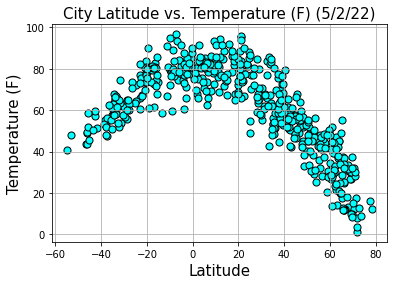

In [45]:
plt.scatter(cleaned_df['Latitude'], cleaned_df['Temperature (F)'], s=50, color='cyan', edgecolor='black')
plt.xlabel("Latitude", fontsize=15)
plt.ylabel("Temperature (F)", fontsize=15)
plt.title("City Latitude vs. Temperature (F) (5/2/22)", fontsize=15)
plt.grid();

## Latitude vs. Humidity Plot

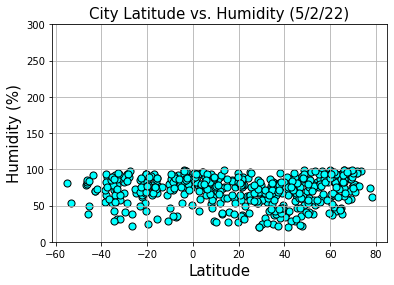

In [44]:
plt.scatter(cleaned_df['Latitude'], cleaned_df['Humidity (%)'], s=50, color='cyan', edgecolor='black')
plt.xlabel("Latitude", fontsize=15)
plt.ylabel("Humidity (%)", fontsize=15)
plt.title("City Latitude vs. Humidity (5/2/22)", fontsize=15)
plt.grid()
plt.ylim(0, 300);

## Latitude vs. Cloudiness Plot

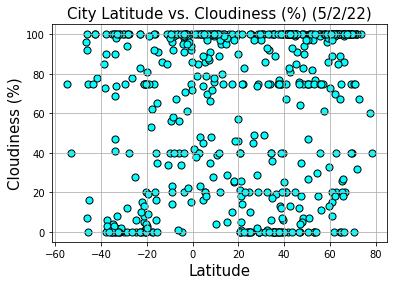

In [43]:
plt.scatter(cleaned_df['Latitude'], cleaned_df['Cloudiness (%)'], s=50, color='cyan', edgecolor='black')
plt.xlabel("Latitude", fontsize=15)
plt.ylabel("Cloudiness (%)", fontsize=15)
plt.title("City Latitude vs. Cloudiness (%) (5/2/22)", fontsize=15)
plt.grid()
plt.ylim(-5, 105);

## Latitude vs. Wind Speed Plot

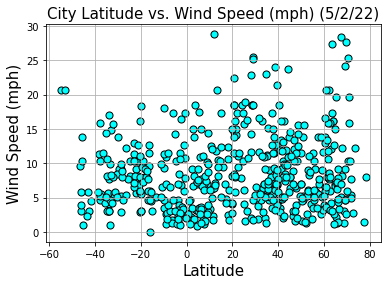

In [46]:
plt.scatter(cleaned_df['Latitude'], cleaned_df['Wind Speed (mph)'], s=50, color='cyan', edgecolor='black')
plt.xlabel("Latitude", fontsize=15)
plt.ylabel("Wind Speed (mph)", fontsize=15)
plt.title("City Latitude vs. Wind Speed (mph) (5/2/22)", fontsize=15)
plt.grid();

## Linear Regression

In [16]:
import scipy.stats as st
from scipy.stats import linregress

# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

Latitude = cleaned_df['Latitude']
Temperature = cleaned_df['Temperature (F)']
Humidity = cleaned_df['Humidity (%)']
Cloudiness = cleaned_df['Cloudiness (%)']
WindSpeed = cleaned_df['Wind Speed (mph)']

# Calculate the correlation coefficient between mouse weight and average tumor volume
# Sicpy Stat
(LT_slope, LT_intercept, LT_rvalue, LT_pvalue, LT_stderr) = st.linregress(Latitude, Temperature)
(LH_slope, LH_intercept, LH_rvalue, LH_pvalue, LH_stderr) = st.linregress(Latitude, Humidity)
(LC_slope, LC_intercept, LC_rvalue, LC_pvalue, LC_stderr) = st.linregress(Latitude, Cloudiness)
(LW_slope, LW_intercept, LW_rvalue, LW_pvalue, LW_stderr) = st.linregress(Latitude, WindSpeed)

print(f'*Correlation values Latitude vs Temperature r, p-values: {round(LT_rvalue, 3)}, {round(LT_pvalue, 3)}')
print(f'*Correlation values Latitude vs Humidity    r, p-values: {round(LH_rvalue, 3)}, {round(LH_pvalue, 3)}')
print(f'*Correlation values Latitude vs Cloudiness  r, p-values: {round(LC_rvalue, 3)}, {round(LC_pvalue, 3)}')
print(f'*Correlation values Latitude vs Wind Speed  r, p-values: {round(LW_rvalue, 3)}, {round(LW_pvalue, 3)}')

*Correlation values Latitude vs Temperature r, p-values: -0.604, 0.0
*Correlation values Latitude vs Humidity    r, p-values: -0.013, 0.771
*Correlation values Latitude vs Cloudiness  r, p-values: 0.163, 0.0
*Correlation values Latitude vs Wind Speed  r, p-values: 0.112, 0.01


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

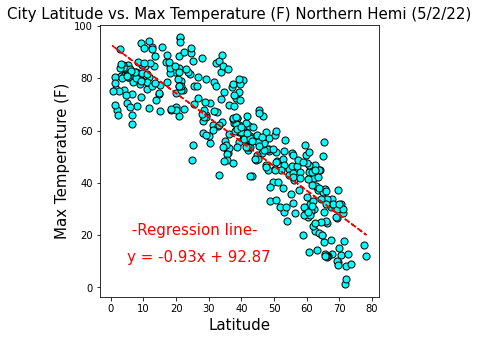

In [47]:
NHemi = cleaned_df.loc[cleaned_df['Latitude'] > 0]

x_lat1 = NHemi['Latitude']
y_Nmtemp = NHemi['Max Temperature (F)']

# Calculate the correlation coefficient between mouse weight and average tumor volume
# Sicpy Stat
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_lat1, y_Nmtemp)

# Linear Regression Formula
y_pred_NH = [] # List to store prediction values
y_pred_NH = round(slope, 2)*x_lat1 + round(intercept, 2)

plt.figure(figsize=(5, 5))
plt.scatter(NHemi['Latitude'], NHemi['Max Temperature (F)'], s=50, color='cyan', edgecolor='black')
plt.plot(x_lat1, y_pred_NH, color='r', linestyle='--')
plt.xlabel("Latitude", fontsize=15)
plt.ylabel("Max Temperature (F)", fontsize=15)
plt.title("City Latitude vs. Max Temperature (F) Northern Hemi (5/2/22)", fontsize=15)
plt.annotate(f"y = {round(slope, 2)}x + {round(intercept, 2)}", (5,10), fontsize=15, color="red")
plt.annotate(" -Regression line-", (5,20), fontsize=15, color="red")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

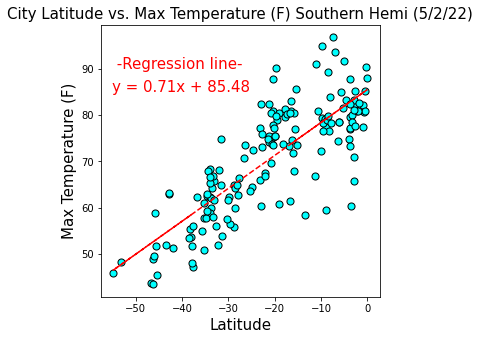

In [48]:
SHemi = cleaned_df.loc[cleaned_df['Latitude'] < 0]

x_lat2 = SHemi['Latitude']
y_Smtemp = SHemi['Max Temperature (F)']

# Calculate the correlation coefficient between mouse weight and average tumor volume
# Sicpy Stat
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_lat2, y_Smtemp)

# Linear Regression Formula
y_pred_SH = [] # List to store prediction values
y_pred_SH = round(slope, 2)*x_lat2 + round(intercept, 2)

plt.figure(figsize=(5, 5))
plt.scatter(SHemi['Latitude'], SHemi['Max Temperature (F)'], s=50, color='cyan', edgecolor='black')
plt.plot(x_lat2, y_pred_SH, color='r', linestyle='--')
plt.xlabel("Latitude", fontsize=15)
plt.ylabel("Max Temperature (F)", fontsize=15)
plt.title("City Latitude vs. Max Temperature (F) Southern Hemi (5/2/22)", fontsize=15)
plt.annotate(f"y = {round(slope, 2)}x + {round(intercept, 2)}", (-55,85), fontsize=15, color="red")
plt.annotate(" -Regression line-", (-55,90), fontsize=15, color="red")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

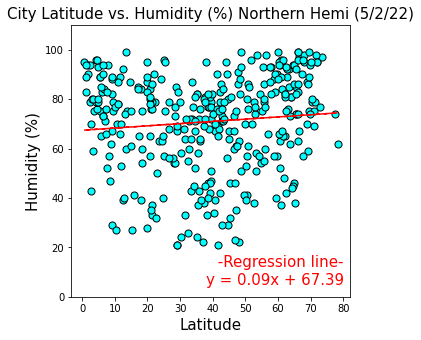

In [49]:
x_lat3 = NHemi['Latitude']
y_Nhumi = NHemi['Humidity (%)']

# Calculate the correlation coefficient between mouse weight and average tumor volume
# Sicpy Stat
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_lat3, y_Nhumi)

# Linear Regression Formula
y_pred_NHh = [] # List to store prediction values
y_pred_NHh = round(slope, 2)*x_lat3 + round(intercept, 2)

plt.figure(figsize=(5, 5))
plt.scatter(NHemi['Latitude'], NHemi['Humidity (%)'], s=50, color='cyan', edgecolor='black')
plt.plot(x_lat3, y_pred_NHh, color='r', linestyle='--')
plt.xlabel("Latitude", fontsize=15)
plt.ylabel("Humidity (%)", fontsize=15)
plt.title("City Latitude vs. Humidity (%) Northern Hemi (5/2/22)", fontsize=15)
plt.ylim(0, 110)
plt.annotate(f"y = {round(slope, 2)}x + {round(intercept, 2)}", (38,5), fontsize=15, color="red")
plt.annotate(" -Regression line-", (40,12), fontsize=15, color="red")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

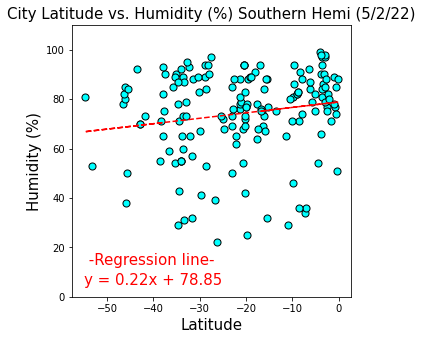

In [50]:
x_lat4 = SHemi['Latitude']
y_Shumi = SHemi['Humidity (%)']

# Calculate the correlation coefficient between mouse weight and average tumor volume
# Sicpy Stat
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_lat4, y_Shumi)

# Linear Regression Formula
y_pred_SHh = [] # List to store prediction values
y_pred_SHh = round(slope, 2)*x_lat4 + round(intercept, 2)

plt.figure(figsize=(5, 5))
plt.scatter(SHemi['Latitude'], SHemi['Humidity (%)'], s=50, color='cyan', edgecolor='black')
plt.plot(x_lat4, y_pred_SHh, color='r', linestyle='--')
plt.xlabel("Latitude", fontsize=15)
plt.ylabel("Humidity (%)", fontsize=15)
plt.title("City Latitude vs. Humidity (%) Southern Hemi (5/2/22)", fontsize=15)
plt.ylim(0, 110)
plt.annotate(f"y = {round(slope, 2)}x + {round(intercept, 2)}", (-55,5), fontsize=15, color="red")
plt.annotate(" -Regression line-", (-55,13), fontsize=15, color="red")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

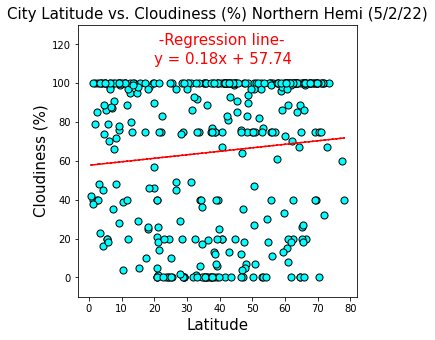

In [51]:
x_lat5 = NHemi['Latitude']
y_NCloud = NHemi['Cloudiness (%)']

# Calculate the correlation coefficient between mouse weight and average tumor volume
# Sicpy Stat
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_lat5, y_NCloud)

# Linear Regression Formula
y_pred_NHC = [] # List to store prediction values
y_pred_NHC = round(slope, 2)*x_lat5 + round(intercept, 2)

plt.figure(figsize=(5, 5))
plt.scatter(NHemi['Latitude'], NHemi['Cloudiness (%)'], s=50, color='cyan', edgecolor='black')
plt.plot(x_lat5, y_pred_NHC, color='r', linestyle='--')
plt.xlabel("Latitude", fontsize=15)
plt.ylabel("Cloudiness (%)", fontsize=15)
plt.title("City Latitude vs. Cloudiness (%) Northern Hemi (5/2/22)", fontsize=15)
plt.ylim(-10, 130)
plt.annotate(f"y = {round(slope, 2)}x + {round(intercept, 2)}", (20,110), fontsize=15, color="red")
plt.annotate(" -Regression line-", (20,120), fontsize=15, color="red")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

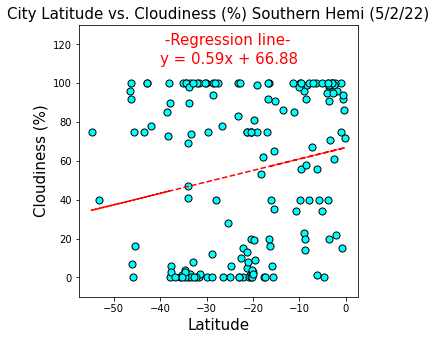

In [52]:
#plt.scatter(SHemi['Latitude'], SHemi['Cloudiness (%)'])

x_lat6 = SHemi['Latitude']
y_SCloud = SHemi['Cloudiness (%)']

# Calculate the correlation coefficient between mouse weight and average tumor volume
# Sicpy Stat
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_lat6, y_SCloud)

# Linear Regression Formula
y_pred_SHC = [] # List to store prediction values
y_pred_SHC = round(slope, 2)*x_lat6 + round(intercept, 2)

plt.figure(figsize=(5, 5))
plt.scatter(SHemi['Latitude'], SHemi['Cloudiness (%)'], s=50, color='cyan', edgecolor='black')
plt.plot(x_lat6, y_pred_SHC, color='r', linestyle='--')
plt.xlabel("Latitude", fontsize=15)
plt.ylabel("Cloudiness (%)", fontsize=15)
plt.title("City Latitude vs. Cloudiness (%) Southern Hemi (5/2/22)", fontsize=15)
plt.ylim(-10, 130)
plt.annotate(f"y = {round(slope, 2)}x + {round(intercept, 2)}", (-40,110), fontsize=15, color="red")
plt.annotate(" -Regression line-", (-40,120), fontsize=15, color="red")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

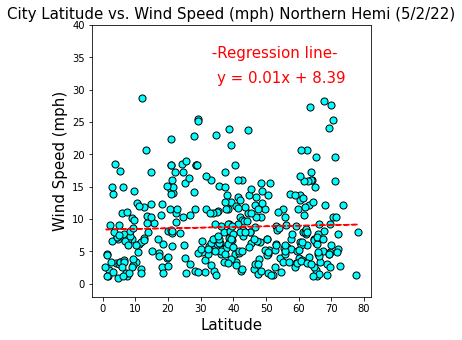

In [53]:
#plt.scatter(NHemi['Latitude'], NHemi['Wind Speed (mph)'])

x_lat7 = NHemi['Latitude']
y_NWS = NHemi['Wind Speed (mph)']

# Calculate the correlation coefficient between mouse weight and average tumor volume
# Sicpy Stat
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_lat7, y_NWS)

# Linear Regression Formula
y_pred_NWS = [] # List to store prediction values
y_pred_NWS = round(slope, 2)*x_lat7 + round(intercept, 2)

plt.figure(figsize=(5, 5))
plt.scatter(NHemi['Latitude'], NHemi['Wind Speed (mph)'], s=50, color='cyan', edgecolor='black')
plt.plot(x_lat7, y_pred_NWS, color='r', linestyle='--')
plt.xlabel("Latitude", fontsize=15)
plt.ylabel("Wind Speed (mph)", fontsize=15)
plt.title("City Latitude vs. Wind Speed (mph) Northern Hemi (5/2/22)", fontsize=15)
plt.ylim(-2, 40)
plt.annotate(f"y = {round(slope, 2)}x + {round(intercept, 2)}", (35,31), fontsize=15, color="red")
plt.annotate(" -Regression line-", (32,35), fontsize=15, color="red")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

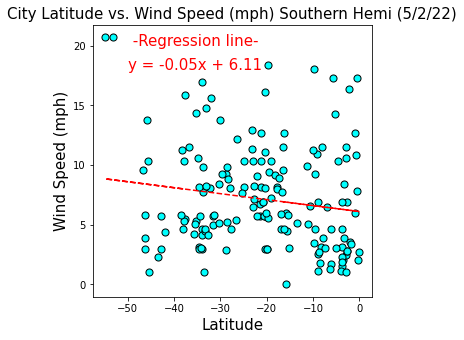

In [60]:
#plt.scatter(SHemi['Latitude'], SHemi['Wind Speed (mph)'])

x_lat8 = SHemi['Latitude']
y_SWS = SHemi['Wind Speed (mph)']

# Calculate the correlation coefficient between mouse weight and average tumor volume
# Sicpy Stat
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_lat8, y_SWS)

# Linear Regression Formula
y_pred_SWS = [] # List to store prediction values
y_pred_SWS = round(slope, 2)*x_lat8 + round(intercept, 2)

plt.figure(figsize=(5, 5))
plt.scatter(SHemi['Latitude'], SHemi['Wind Speed (mph)'], s=50, color='cyan', edgecolor='black')
plt.plot(x_lat8, y_pred_SWS, color='r', linestyle='--')
plt.xlabel("Latitude", fontsize=15)
plt.ylabel("Wind Speed (mph)", fontsize=15)
plt.title("City Latitude vs. Wind Speed (mph) Southern Hemi (5/2/22)", fontsize=15)
plt.annotate(f"y = {round(slope, 2)}x + {round(intercept, 2)}", (-50,18), fontsize=15, color="red")
plt.annotate(" -Regression line-", (-50,20), fontsize=15, color="red")

plt.show()